Load the data

In [25]:
# %% Cell 1: Data Understanding and Exploration
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set your data folder and file path
data_folder = r'C:\Users\Premkumar.Nagendran\OneDrive - Agilisium Consulting India Private Limited\Mini Projects\PowerPulse Household Energy Usage Forecast\data'
data_file = 'household_power_consumption.txt'
data_path = os.path.join(data_folder, data_file)

# Load the data (semicolon separator; '?' indicates missing values)
data = pd.read_csv(
    data_path,
    sep=';',
    parse_dates={'DateTime': ['Date', 'Time']},
    infer_datetime_format=True,
    low_memory=False,
    na_values=['?']
)






C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\2460110964.py:14: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(
C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\2460110964.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(
C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\2460110964.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(


Basic information and summary

In [26]:

print("Data shape:", data.shape)
print(data.head())
print(data.info())
print(data.describe())

Data shape: (2075259, 8)
             DateTime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data c

EDA

Missing values and duplicate values find

In [27]:
#null value check

print(data.isnull().sum())

DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [28]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Store it in a DataFrame for better readability
missing_df = pd.DataFrame({'Column': data.columns, 'Missing_Percentage': missing_percentage})

# Display the missing percentages
print(missing_df)

                                      Column  Missing_Percentage
DateTime                            DateTime            0.000000
Global_active_power      Global_active_power            1.251844
Global_reactive_power  Global_reactive_power            1.251844
Voltage                              Voltage            1.251844
Global_intensity            Global_intensity            1.251844
Sub_metering_1                Sub_metering_1            1.251844
Sub_metering_2                Sub_metering_2            1.251844
Sub_metering_3                Sub_metering_3            1.251844


In [ ]:
# check for duplicate values

print(data.duplicated().sum())  # Count of duplicate rows
print(data[data.duplicated()])  # Display duplicate rows


0
Empty DataFrame
Columns: [DateTime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


Parse Date-Time Features

In [39]:
# Create additional time-based features for exploration
data['year'] = data['DateTime'].dt.year
data['month'] = data['DateTime'].dt.month
data['day'] = data['DateTime'].dt.day
data['hour'] = data['DateTime'].dt.hour
data['minute'] = data['DateTime'].dt.minute
data['day_of_week'] = data['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

In [ ]:
# numeric columns
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

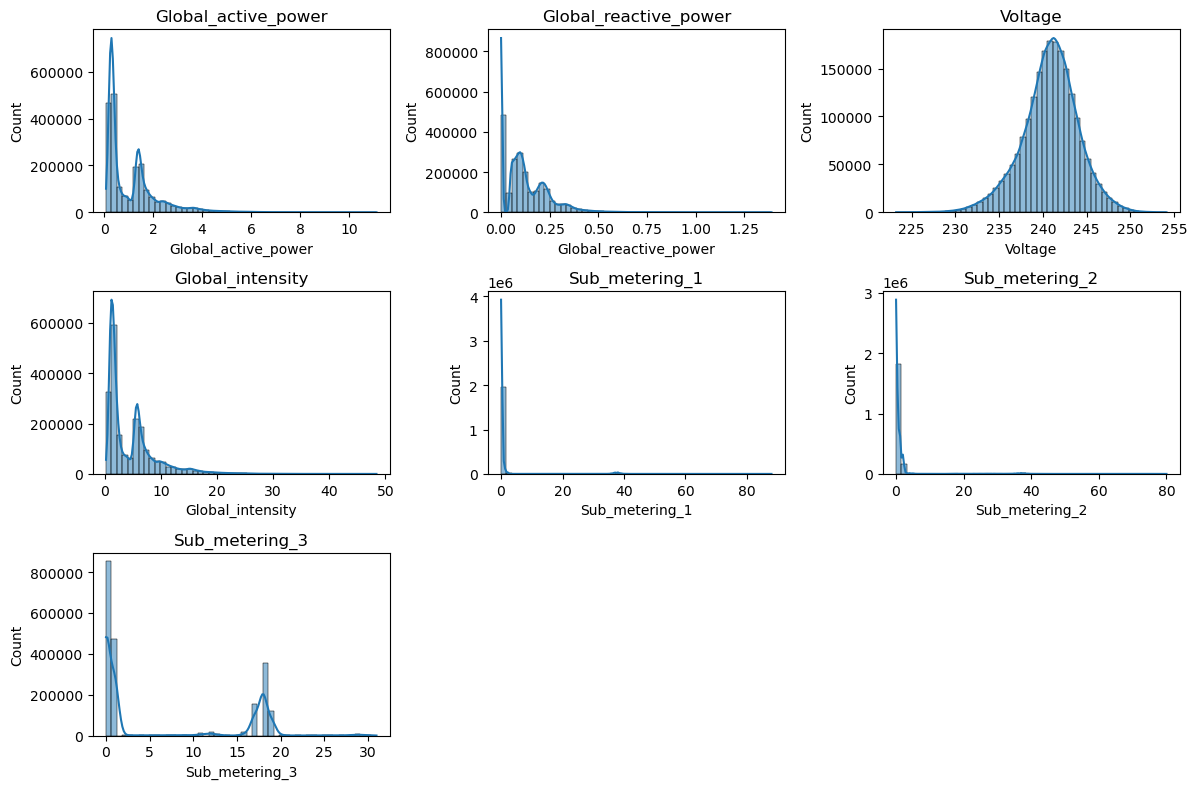

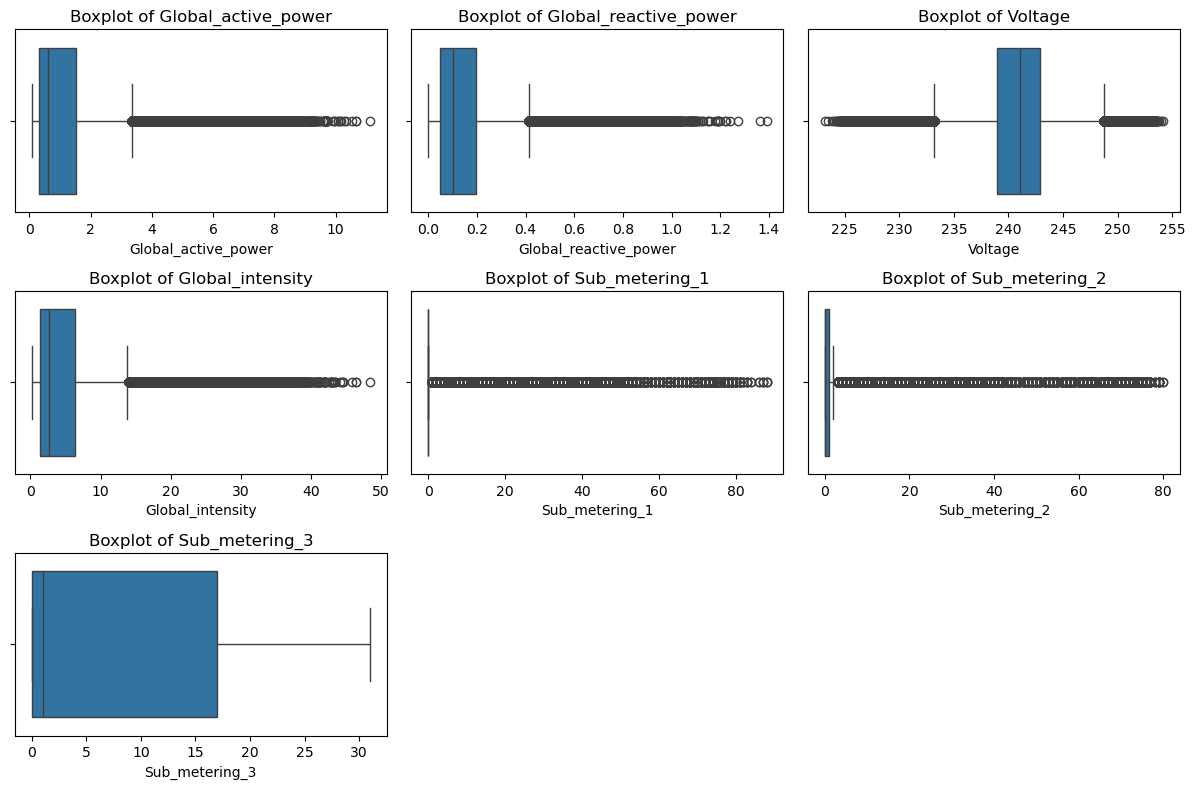

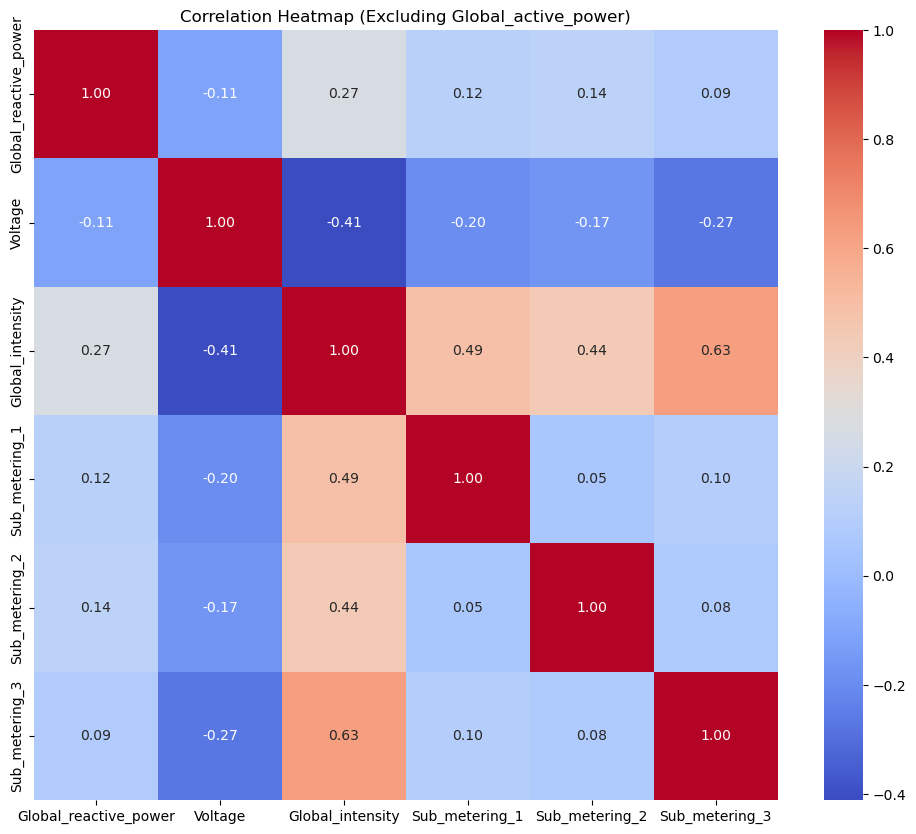

In [ ]:

# ---- Univariate Analysis ----
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# ---- Outlier Detection using Boxplots ----
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# ---- Bivariate Analysis: Correlation Heatmap (excluding target) ----
# Exclude 'Global_active_power' from the feature set for correlation
feature_cols_for_corr = [col for col in numeric_cols if col != 'Global_active_power']
additional_time_features = ['hour', 'minute', 'day_of_week', 'month']
corr_matrix = data[feature_cols_for_corr + additional_time_features].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Excluding Global_active_power)")
plt.show()



Probability distribution of target variable

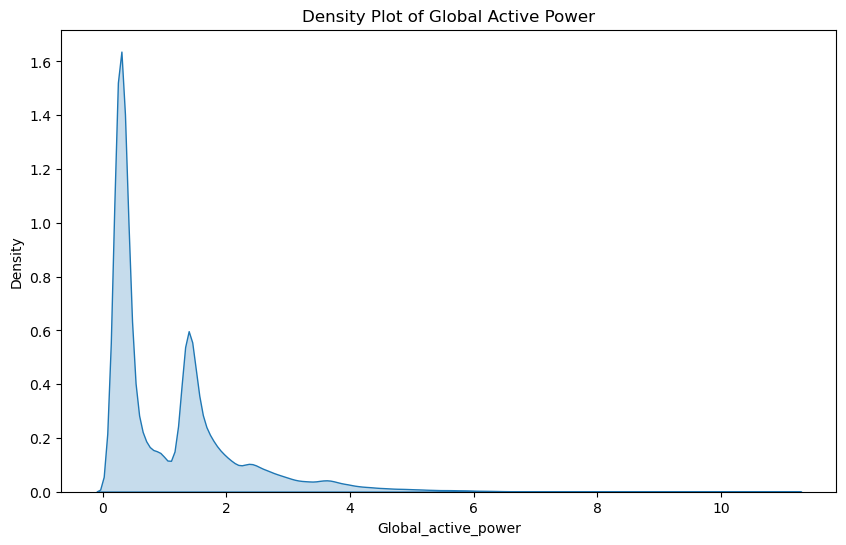

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Global_active_power', fill=True)
plt.title("Density Plot of Global Active Power")
plt.show()


Multivariate Analysis

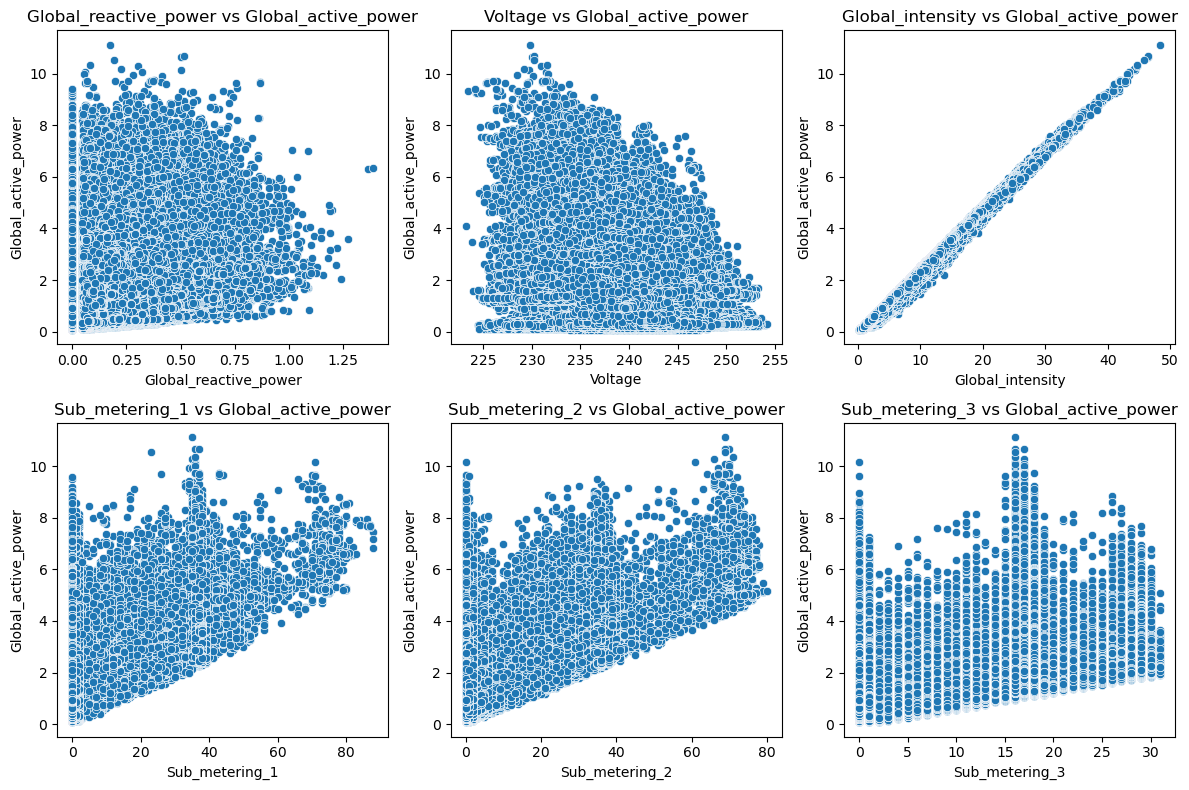

In [37]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    if col != 'Global_active_power':  # Exclude target itself
        plt.subplot(2, 3, i)
        sns.scatterplot(data=data, x=col, y="Global_active_power")
        plt.title(f"{col} vs Global_active_power")
plt.tight_layout()
plt.show()


Power Consumption by Hour

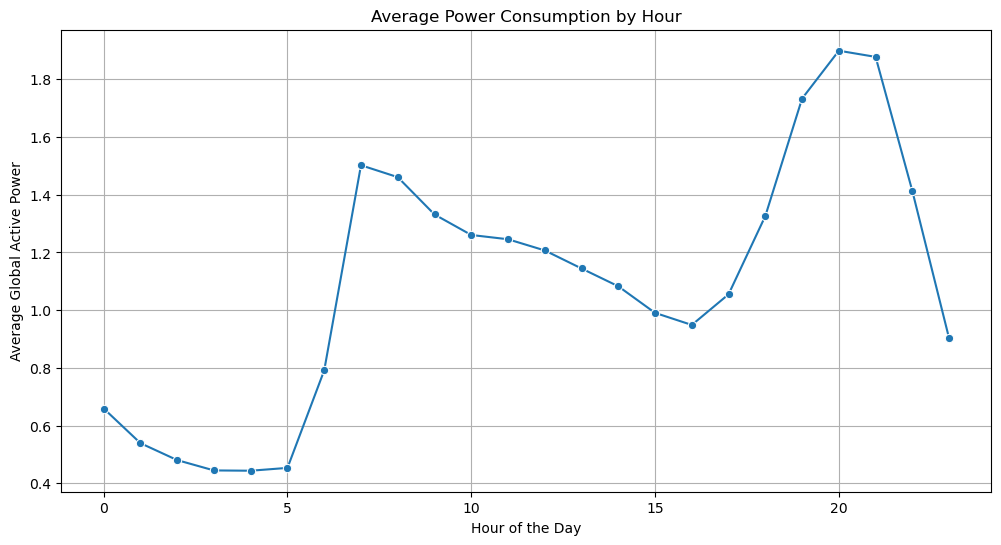

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.groupby('hour')['hour'].mean(), y=data.groupby('hour')['Global_active_power'].mean(), marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power")
plt.title("Average Power Consumption by Hour")
plt.grid()
plt.show()


Monthly Power Consumption Trend

C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\581737379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


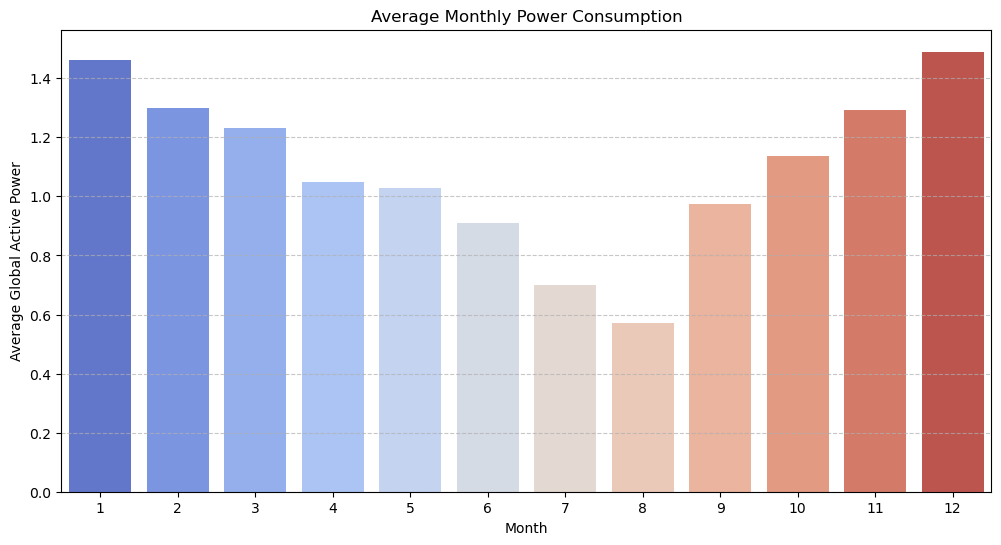

In [47]:
plt.figure(figsize=(12, 6))
monthly_avg = data.groupby("month")["Global_active_power"].mean()  # Get average per month
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average Global Active Power")
plt.title("Average Monthly Power Consumption")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Weekly Power Consumption Trend

C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\817948639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=weekly_avg.values, palette="viridis")


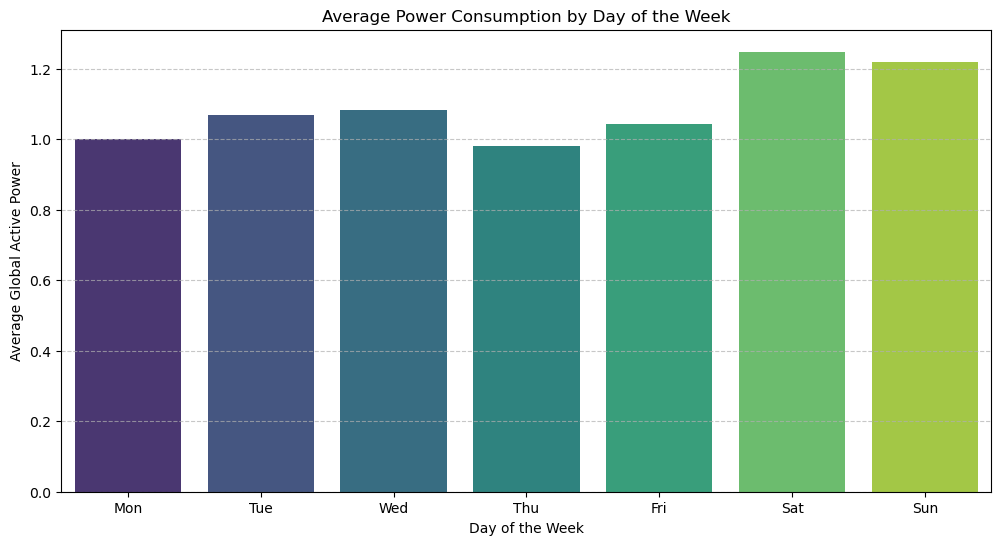

In [46]:
plt.figure(figsize=(12, 6))
weekly_avg = data.groupby("day_of_week")["Global_active_power"].mean()
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=weekly_avg.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Average Global Active Power")
plt.title("Average Power Consumption by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Data Preprocessing

Filling Missing Values

In [7]:
# Define threshold (e.g., remove columns with more than 50% missing values)
threshold = 50  
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data.drop(columns=columns_to_drop, inplace=True)

# Fill remaining missing values based on distribution
for col in numeric_cols:
    if data[col].isnull().any():  # Only process columns with missing values
        skew_val = data[col].skew()  # Compute skewness
        print(f"{col} skewness: {skew_val:.2f}", end=" → ")

        if abs(skew_val) < 0.5:  # Normal Distribution → Use Mean
            data[col].fillna(data[col].mean(), inplace=True)
            print("Filled with Mean")
        else:  # Skewed Distribution → Use Median
            data[col].fillna(data[col].median(), inplace=True)
            print("Filled with Median")

Global_active_power skewness: 1.79 → Filled with Median
Global_reactive_power skewness: 1.26 → Filled with Median
Voltage skewness: -0.33 → 

C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\437220890.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Premkumar.Nagendran\AppData\Local\Temp\ipykernel_20904\437220890.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Filled with Mean
Global_intensity skewness: 1.85 → Filled with Median
Sub_metering_1 skewness: 5.94 → Filled with Median
Sub_metering_2 skewness: 7.09 → Filled with Median
Sub_metering_3 skewness: 0.72 → Filled with Median


In [8]:
print(data.isnull().sum())

DateTime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:

# ---- Check Skewness & Apply Log Transformation (if needed) ----
for col in numeric_cols:
    skew_val = data[col].skew()
    print(f"{col} skewness: {skew_val:.2f}")

    if abs(skew_val) > 1:  # Highly skewed data
        print(f"Applying log transformation for {col} (Highly skewed).")
        data[col] = np.log1p(data[col])  # log(1+x) transformation
    else:
        print(f"No transformation needed for {col} (Moderate/Normal Skew).")

    print(f"Final decision for {col}: {'Log Transformation' if abs(skew_val) > 1 else 'No Change'}\n")

# ---- Outlier Handling using IQR Clipping ----
for col in numeric_cols:
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data[col] = data[col].clip(lower_bound, upper_bound)
    print(f"{col} outliers clipped to range ({lower_bound:.2f}, {upper_bound:.2f})")

# ---- Remove Highly Correlated Features (No Change) ----
threshold = 0.75
cols_to_drop = set()
corr_matrix_no_na = corr_matrix.fillna(0)
for i in range(len(corr_matrix_no_na.columns)):
    for j in range(i):
        if abs(corr_matrix_no_na.iloc[i, j]) > threshold:
            colname = corr_matrix_no_na.columns[i]
            print(f"High correlation: {corr_matrix_no_na.columns[j]} & {colname} (corr = {corr_matrix_no_na.iloc[i,j]:.2f}). Dropping {colname}.")
            cols_to_drop.add(colname)
print("Columns to drop:", cols_to_drop)


Additional features

In [ ]:
# %% Cell 2: Additional Preprocessing – Daily Averages and Peak Hours
# Extract date for aggregation (without time)
data['Date'] = data['DateTime'].dt.date

# Daily Average: Group by Date and calculate mean of Global_active_power
daily_avg = data.groupby('Date')['Global_active_power'].mean().reset_index()
daily_avg.rename(columns={'Global_active_power': 'Daily_Avg_Global_active_power'}, inplace=True)
print("Daily Average (first 5 rows):")
print(daily_avg.head())

# Save daily averages as a CSV file
daily_avg_csv_path = os.path.join(data_folder, 'daily_average_global_active_power.csv')
daily_avg.to_csv(daily_avg_csv_path, index=False)
print("Daily average data saved to:", daily_avg_csv_path)

# Peak Hours: Group by hour and calculate mean Global_active_power
hourly_avg = data.groupby('hour')['Global_active_power'].mean().reset_index()
hourly_avg.rename(columns={'Global_active_power': 'Hourly_Avg_Global_active_power'}, inplace=True)
print("Peak Hours (Top 5 by average power):")
print(hourly_avg.sort_values(by='Hourly_Avg_Global_active_power', ascending=False).head())

# Save Peak Hours as a CSV file
peak_hours_csv_path = os.path.join(data_folder, 'peak_hours_global_active_power.csv')
hourly_avg.to_csv(peak_hours_csv_path, index=False)
print("Peak Hours data saved to:",peak_hours_csv_path)


Daily Average (first 5 rows):
         Date  Daily_Avg_Global_active_power
0  2006-12-16                       1.363337
1  2006-12-17                       1.136308
2  2006-12-18                       0.847503
3  2006-12-19                       0.647337
4  2006-12-20                       0.806075
Daily average data saved to: C:\Users\Premkumar.Nagendran\OneDrive - Agilisium Consulting India Private Limited\Mini Projects\PowerPulse Household Energy Usage Forecast\data\daily_average_global_active_power.csv
Peak Hours (Top 5 by average power):
    hour  Hourly_Avg_Global_active_power
21    21                        0.952969
20    20                        0.949620
19    19                        0.887055
8      8                        0.823842
7      7                        0.817383


Feature Engineering

In [26]:
# %% Cell 3: Data Preprocessing for Modeling and Feature Selection
from sklearn.preprocessing import StandardScaler

# Define initial feature list (without target)
initial_feature_cols = ['hour', 'minute', 'day_of_week', 'month',
                        'Global_reactive_power', 'Voltage', 'Global_intensity',
                        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Remove features that are highly correlated (if any)
feature_cols = [col for col in initial_feature_cols if col not in cols_to_drop]
print("Features used for modeling:", feature_cols)

# Define X (features) and y (target)
X = data[feature_cols]
y = data['Global_active_power']

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Features used for modeling: ['hour', 'minute', 'day_of_week', 'month', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


Model Selection and Training

In [33]:
# %% Model Selection, Training, and Evaluation
import time
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data chronologically (80% train, 20% test)
split_index = int(0.8 * len(data))
X_train_scaled, X_test_scaled = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Training set:", X_train_scaled.shape, y_train.shape)
print("Testing set:", X_test_scaled.shape, y_test.shape)

# --- Define Models and Hyperparameter Grids ---
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# Dictionary to hold model configurations
models_config = {}

# Linear Regression (no hyperparameters to tune)
models_config['Linear Regression'] = {
    'model': LinearRegression(),
    'params': {}
}

# Random Forest Regression (Memory Optimized)
models_config['Random Forest'] = {
    'model': RandomForestRegressor(random_state=42),
    'params': {'n_estimators': [50, 100], 'max_depth': [10, 20]}
}

# Gradient Boosting Regression
models_config['Gradient Boosting'] = {
    'model': GradientBoostingRegressor(random_state=42),
    'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5]}
}

# Neural Network (MLP Regressor)
models_config['Neural Network'] = {
    'model': MLPRegressor(random_state=42, max_iter=500),
    'params': {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'alpha': [0.0001, 0.001]}
}

# AdaBoost Regression
models_config['AdaBoost'] = {
    'model': AdaBoostRegressor(random_state=42),
    'params': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.5, 1.0]}
}

# Train models, tune hyperparameters (if applicable), and evaluate
models = {}
results = {}

# Step 1: Run Hyperparameter Tuning on 20% of Training Data
print("\n===== Phase 1: Hyperparameter Tuning on Sample Data =====")
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, train_size=0.2, random_state=42)

for name, config in models_config.items():
    print(f"\nTraining {name}...")
    model = config['model']
    params = config['params']
    
    if params:  # Perform GridSearchCV if hyperparameters are provided
        grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=2, error_score='raise')
        start = time.time()
        grid.fit(X_train_sample, y_train_sample)  # Train on subset
        print(f"{name} tuning time: {time.time() - start:.2f} seconds")
        best_model = grid.best_estimator_
        print(f"Best parameters for {name}:", grid.best_params_)
    else:
        # For Linear Regression (or models without parameters)
        start = time.time()
        model.fit(X_train_sample, y_train_sample)
        print(f"{name} training time: {time.time() - start:.2f} seconds")
        best_model = model

    models[name] = best_model
    y_pred = best_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = rmse
    print(f"{name} -- RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

# Step 2: Identify Top 3 Models Based on RMSE
top_models = sorted(results.items(), key=lambda x: x[1])[:3]  # Get 3 models with lowest RMSE
top_model_names = [name for name, _ in top_models]

print("\nTop 3 models selected for full training:", top_model_names)

# Step 3: Retrain the Best 3 Models on Full Data
print("\n===== Phase 2: Full Training on Selected Models =====")
final_models = {}
final_results = {}

for name in top_model_names:
    print(f"\nRetraining {name} on full training data...")
    start = time.time()
    models[name].fit(X_train_scaled, y_train)  # Train on full data
    print(f"{name} retraining time: {time.time() - start:.2f} seconds")

    # Evaluate on test set
    y_pred = models[name].predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    final_results[name] = rmse
    print(f"{name} (Full Data) -- RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

# Step 4: Identify the Best Model Based on Full Training
best_model_name = min(final_results, key=final_results.get)
print("\n✅ Best final model based on full training:", best_model_name)
best_model = models[best_model_name]


Training set: (1660207, 10) (1660207,)
Testing set: (415052, 10) (415052,)

===== Phase 1: Hyperparameter Tuning on Sample Data =====

Training Linear Regression...
Linear Regression training time: 0.28 seconds
Linear Regression -- RMSE: 0.043, MAE: 0.033, R²: 0.987

Training Random Forest...
Random Forest tuning time: 816.00 seconds
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Random Forest -- RMSE: 0.016, MAE: 0.011, R²: 0.998

Training Gradient Boosting...
Gradient Boosting tuning time: 1667.41 seconds
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting -- RMSE: 0.014, MAE: 0.010, R²: 0.999

Training Neural Network...
Neural Network tuning time: 199.76 seconds
Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Neural Network -- RMSE: 0.015, MAE: 0.010, R²: 0.998

Training AdaBoost...
AdaBoost tuning time: 363.21 seconds
Best parameters for AdaBoost: {'lear

Best Model and Make Predictions

Best model saved to: C:\Users\Premkumar.Nagendran\OneDrive - Agilisium Consulting India Private Limited\Mini Projects\PowerPulse Household Energy Usage Forecast\data\best_model.pkl


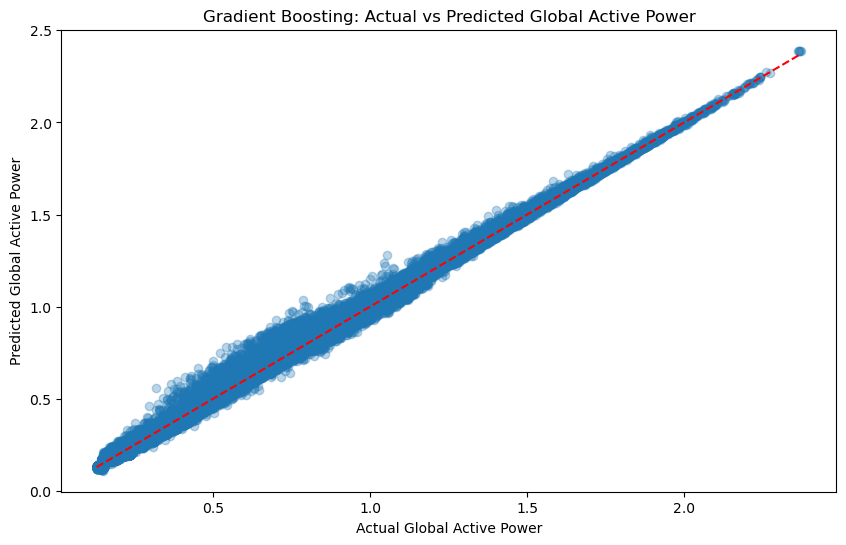

Final Performance of Gradient Boosting -- RMSE: 0.014, MAE: 0.010, R²: 0.999


In [29]:
# %% Cell 5: Save the Best Model and Make Predictions
import pickle

# Save only the best model to a pickle file
best_model_pickle_path = os.path.join(data_folder, 'best_model.pkl')
with open(best_model_pickle_path, 'wb') as f:
    pickle.dump(best_model, f)
print("Best model saved to:", best_model_pickle_path)

# To simulate a prediction step using the saved model:
with open(best_model_pickle_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Predict on the test set using the loaded best model
y_pred_best = loaded_model.predict(X_test_scaled)

# Visualize Actual vs Predicted values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title(f'{best_model_name}: Actual vs Predicted Global Active Power')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Optionally, print final performance metrics
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
final_mae = mean_absolute_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)
print(f"Final Performance of {best_model_name} -- RMSE: {final_rmse:.3f}, MAE: {final_mae:.3f}, R²: {final_r2:.3f}")


Load and Predict

In [53]:
import pickle
import numpy as np

# Define the correct path to your saved model
model_path = r"data\best_model.pkl"  # Adjust the path if needed

# Load the model
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Example input features
sample_input = np.array([[14, 30, 2, 4, 0.2, 235.0, 1.2, 0.0, 1.0, 0.5]])  # Modify as needed

# Predict using the loaded model
predicted_output = loaded_model.predict(sample_input)

print("Predicted Global Active Power:", predicted_output[0])


Predicted Global Active Power: 1.1686451288188302
